In [5]:
using PyPlot
using QuantumOptics

In [175]:
# Parameters
N_cutoff = 100

ωc = 1
ωa = 1
Ω = 1.

b_fock = FockBasis(N_cutoff)
b_spin = SpinBasis(1//2)
b = b_fock ⊗ b_spin

[Fock(cutoff=100) ⊗ Spin(1/2)]

In [199]:
# Fundamental operators
a = destroy(b_fock)
at = create(b_fock)
n = number(b_fock)

sm = sigmam(b_spin)
sp = sigmap(b_spin)
sz = sigmaz(b_spin)

# Hamiltonian
Hatom = ωa*sz/2
Hfield = ωc*n
Hint = Ω*(at⊗sm + a⊗sp) / sqrt(2)

H = one(b_fock)⊗Hatom + Hfield⊗one(b_spin) + Hint

Operator(dim=202x202)
  basis: [Fock(cutoff=100) ⊗ Spin(1/2)]sparse([1, 103, 2, 104, 3, 105, 4, 106, 5, 107  …  96, 198, 97, 199, 98, 200, 99, 201, 100, 202], [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47, 48, 48, 49, 49, 50, 50, 51, 51, 52, 52, 53, 53, 54, 54, 55, 55, 56, 56, 57, 57, 58, 58, 59, 59, 60, 60, 61, 61, 62, 62, 63, 63, 64, 64, 65, 65, 66, 66, 67, 67, 68, 68, 69, 69, 70, 70, 71, 71, 72, 72, 73, 73, 74, 74, 75, 75, 76, 76, 77, 77, 78, 78, 79, 79, 80, 80, 81, 81, 82, 82, 83, 83, 84, 84, 85, 85, 86, 86, 87, 87, 88, 88, 89, 89, 90, 90, 91, 91, 92, 92, 93, 93, 94, 94, 95, 95, 96, 96, 97, 97, 98, 98, 99, 99, 100, 100, 101, 102, 103, 103, 104, 104, 105, 105, 106, 106, 107, 1

In [204]:
# Initial state
α = 4.
Ψ0 = coherentstate(b_fock, α) ⊗ spinup(b_spin)

# Integration time
T = [0:0.1:100;]

# Schroedinger time evolution
tout, Ψt = timeevolution.schroedinger(T, Ψ0, H);

In [216]:
HKerrDet(χ, Δ) = one(b_fock)⊗sz/2 + (1.0 + Δ)*n ⊗one(b_spin) + (at⊗sm + a⊗sp) / sqrt(2) + χ * at * at * a * a ⊗ one(b_spin);

# HKerr(χ) = H + χ * at * at * a * a ⊗ one(b_spin);
ΨDet(χ, Δ) = timeevolution.schroedinger(T, Ψ0, HKerrDet(χ, Δ))[2];


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


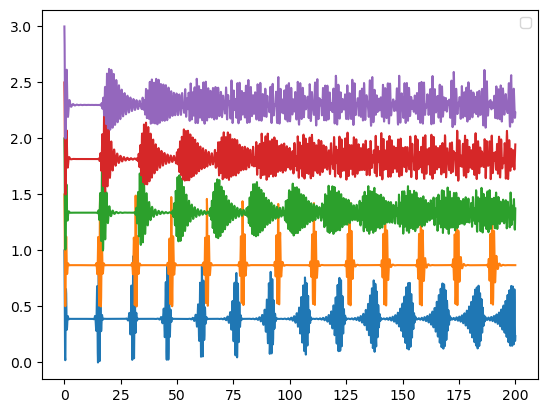

PyObject <matplotlib.legend.Legend object at 0x16ef13220>

In [220]:
# exp_n = real(expect(n ⊗ one(b_spin), Ψt))
# exp_sz = real(expect(one(b_fock) ⊗ sz, Ψt))

T = [0:0.1:200;]
i = 0
figure()
for Δ in [0.0, 1, 2.3, 3, 4]
    res = abs.(expect(spinup(b_spin) ⊗ dagger(spinup(b_spin)) , ptrace.(ΨDet(-0.2, Δ), [1]))) .^2
    max_res = maximum(res)
    min_res = minimum(res)
    res = res .- min_res
    res = res / (max_res - min_res)

    plot(T, 0.5 * i .+ res)
    i += 1
end;

legend()